In [1]:
from lbmpy.session import *
from lbmpy.phasefield.analytical import *
from lbmpy.phasefield.phasefieldstep import PhaseFieldStep
from lbmpy.phasefield.experiments1D import *
from lbmpy.chapman_enskog.derivative import *
from pystencils.datahandling import SerialDataHandling

# Testing N-phase model with penalty term

In [2]:
c = sp.symbols("c_:4")
α = 1
F = free_energy_functional_n_phases_penalty_term(c, kappa=0.05, interface_width=α, penalty_term_factor=0.01)
sc = PhaseFieldStep(F, c, domain_size=(100, 1))

Contour lines of bulk free energy:

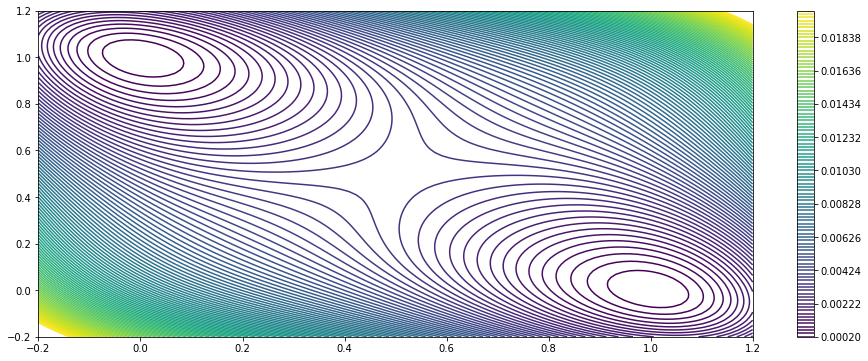

In [3]:
plt.figure()
plot_free_energy_bulk_contours(F, c, phase0=0, phase1=3, levels=np.linspace(0, 0.02, 100))
plt.colorbar();

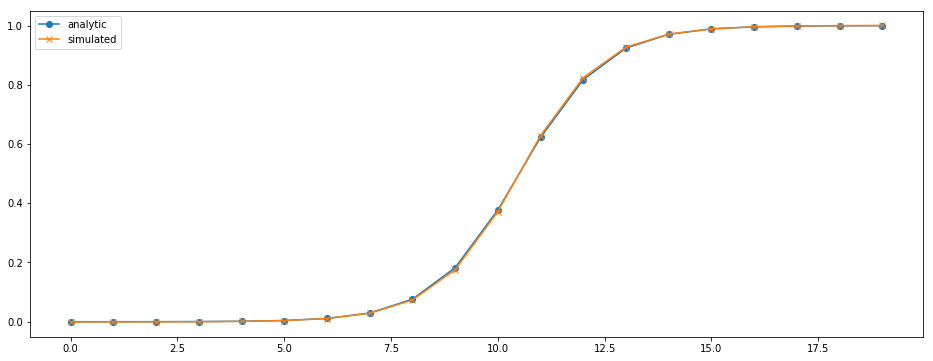

In [4]:
plt.figure()
error = tanh_test(sc, 0, 1, expected_interface_width=α)
assert error < 0.002

Velocity: 0.01  Time steps for round: 10025
Running 5000 initial time steps
Running round 1/2
Running round 2/2


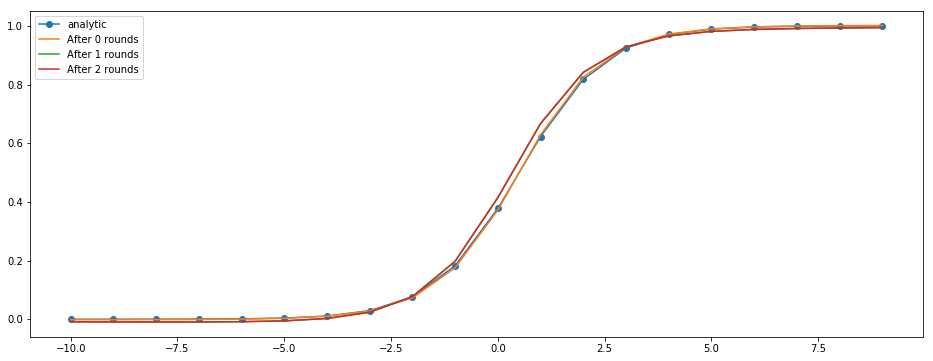

In [5]:
error = galilean_invariance_test(sc, velocity=0.01, phase0=0, phase1=1, expected_interface_width=α, rounds=2)
assert error < 1e-12